#### Import libraries

In [2]:
%pip install pandas numpy scikit-learn matplotlib seaborn

  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.3 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.3 MB 7.1 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.3 MB 6.8 MB/s eta 0:00

In [17]:
%config Completer.use_jedi = False

# General imports for data preprocessing and visualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Imports for KNN model and imports for Decision Tree model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import joblib


#### Load the dataset

In [18]:
column_names = [
    'erythema',
    'scaling',
    'definite_borders',
    'itching',
    'koebner_phenomenon',
    'polygonal_papules',
    'follicular_papules',
    'oral_mucosal_involvement',
    'knee_and_elbow_involvement',
    'scalp_involvement',
    'family_history',
    'melanin_incontinence',
    'eosinophils_infiltrate',
    'PNL_infiltrate',
    'fibrosis_papillary_dermis',
    'exocytosis',
    'acanthosis',
    'hyperkeratosis',
    'parakeratosis',
    'clubbing_rete_ridges',
    'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis',
    'spongiform_pustule',
    'munro_microabcess',
    'focal_hypergranulosis',
    'disappearance_granular_layer',
    'vacuolisation_damage_basal_layer',
    'spongiosis',
    'saw_tooth_retes',
    'follicular_horn_plug',
    'perifollicular_parakeratosis',
    'inflammatory_monoluclear_infiltrate',
    'band_like_infiltrate',
    'age', 
    'class'  # Class label
]

df = pd.read_csv("dataset.csv", header = None, names = column_names, na_values = "?")

In [19]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [20]:
df.tail(5)         

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35.0,1


In [21]:
df.shape

(366, 35)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             366 non-null    int64  
 1   scaling                              366 non-null    int64  
 2   definite_borders                     366 non-null    int64  
 3   itching                              366 non-null    int64  
 4   koebner_phenomenon                   366 non-null    int64  
 5   polygonal_papules                    366 non-null    int64  
 6   follicular_papules                   366 non-null    int64  
 7   oral_mucosal_involvement             366 non-null    int64  
 8   knee_and_elbow_involvement           366 non-null    int64  
 9   scalp_involvement                    366 non-null    int64  
 10  family_history                       366 non-null    int64  
 11  melanin_incontinence            

In [23]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [24]:
df.duplicated()                                   

0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Length: 366, dtype: bool

In [25]:
df.isnull().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [26]:
df['age'] = df['age'].fillna(df['age'].median())

In [27]:
df.isnull().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [28]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [29]:
df.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.003724,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.017285,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.137866,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.046546,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.080599,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.095935,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.370436,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.110527,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.077278,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.037349,-0.533208


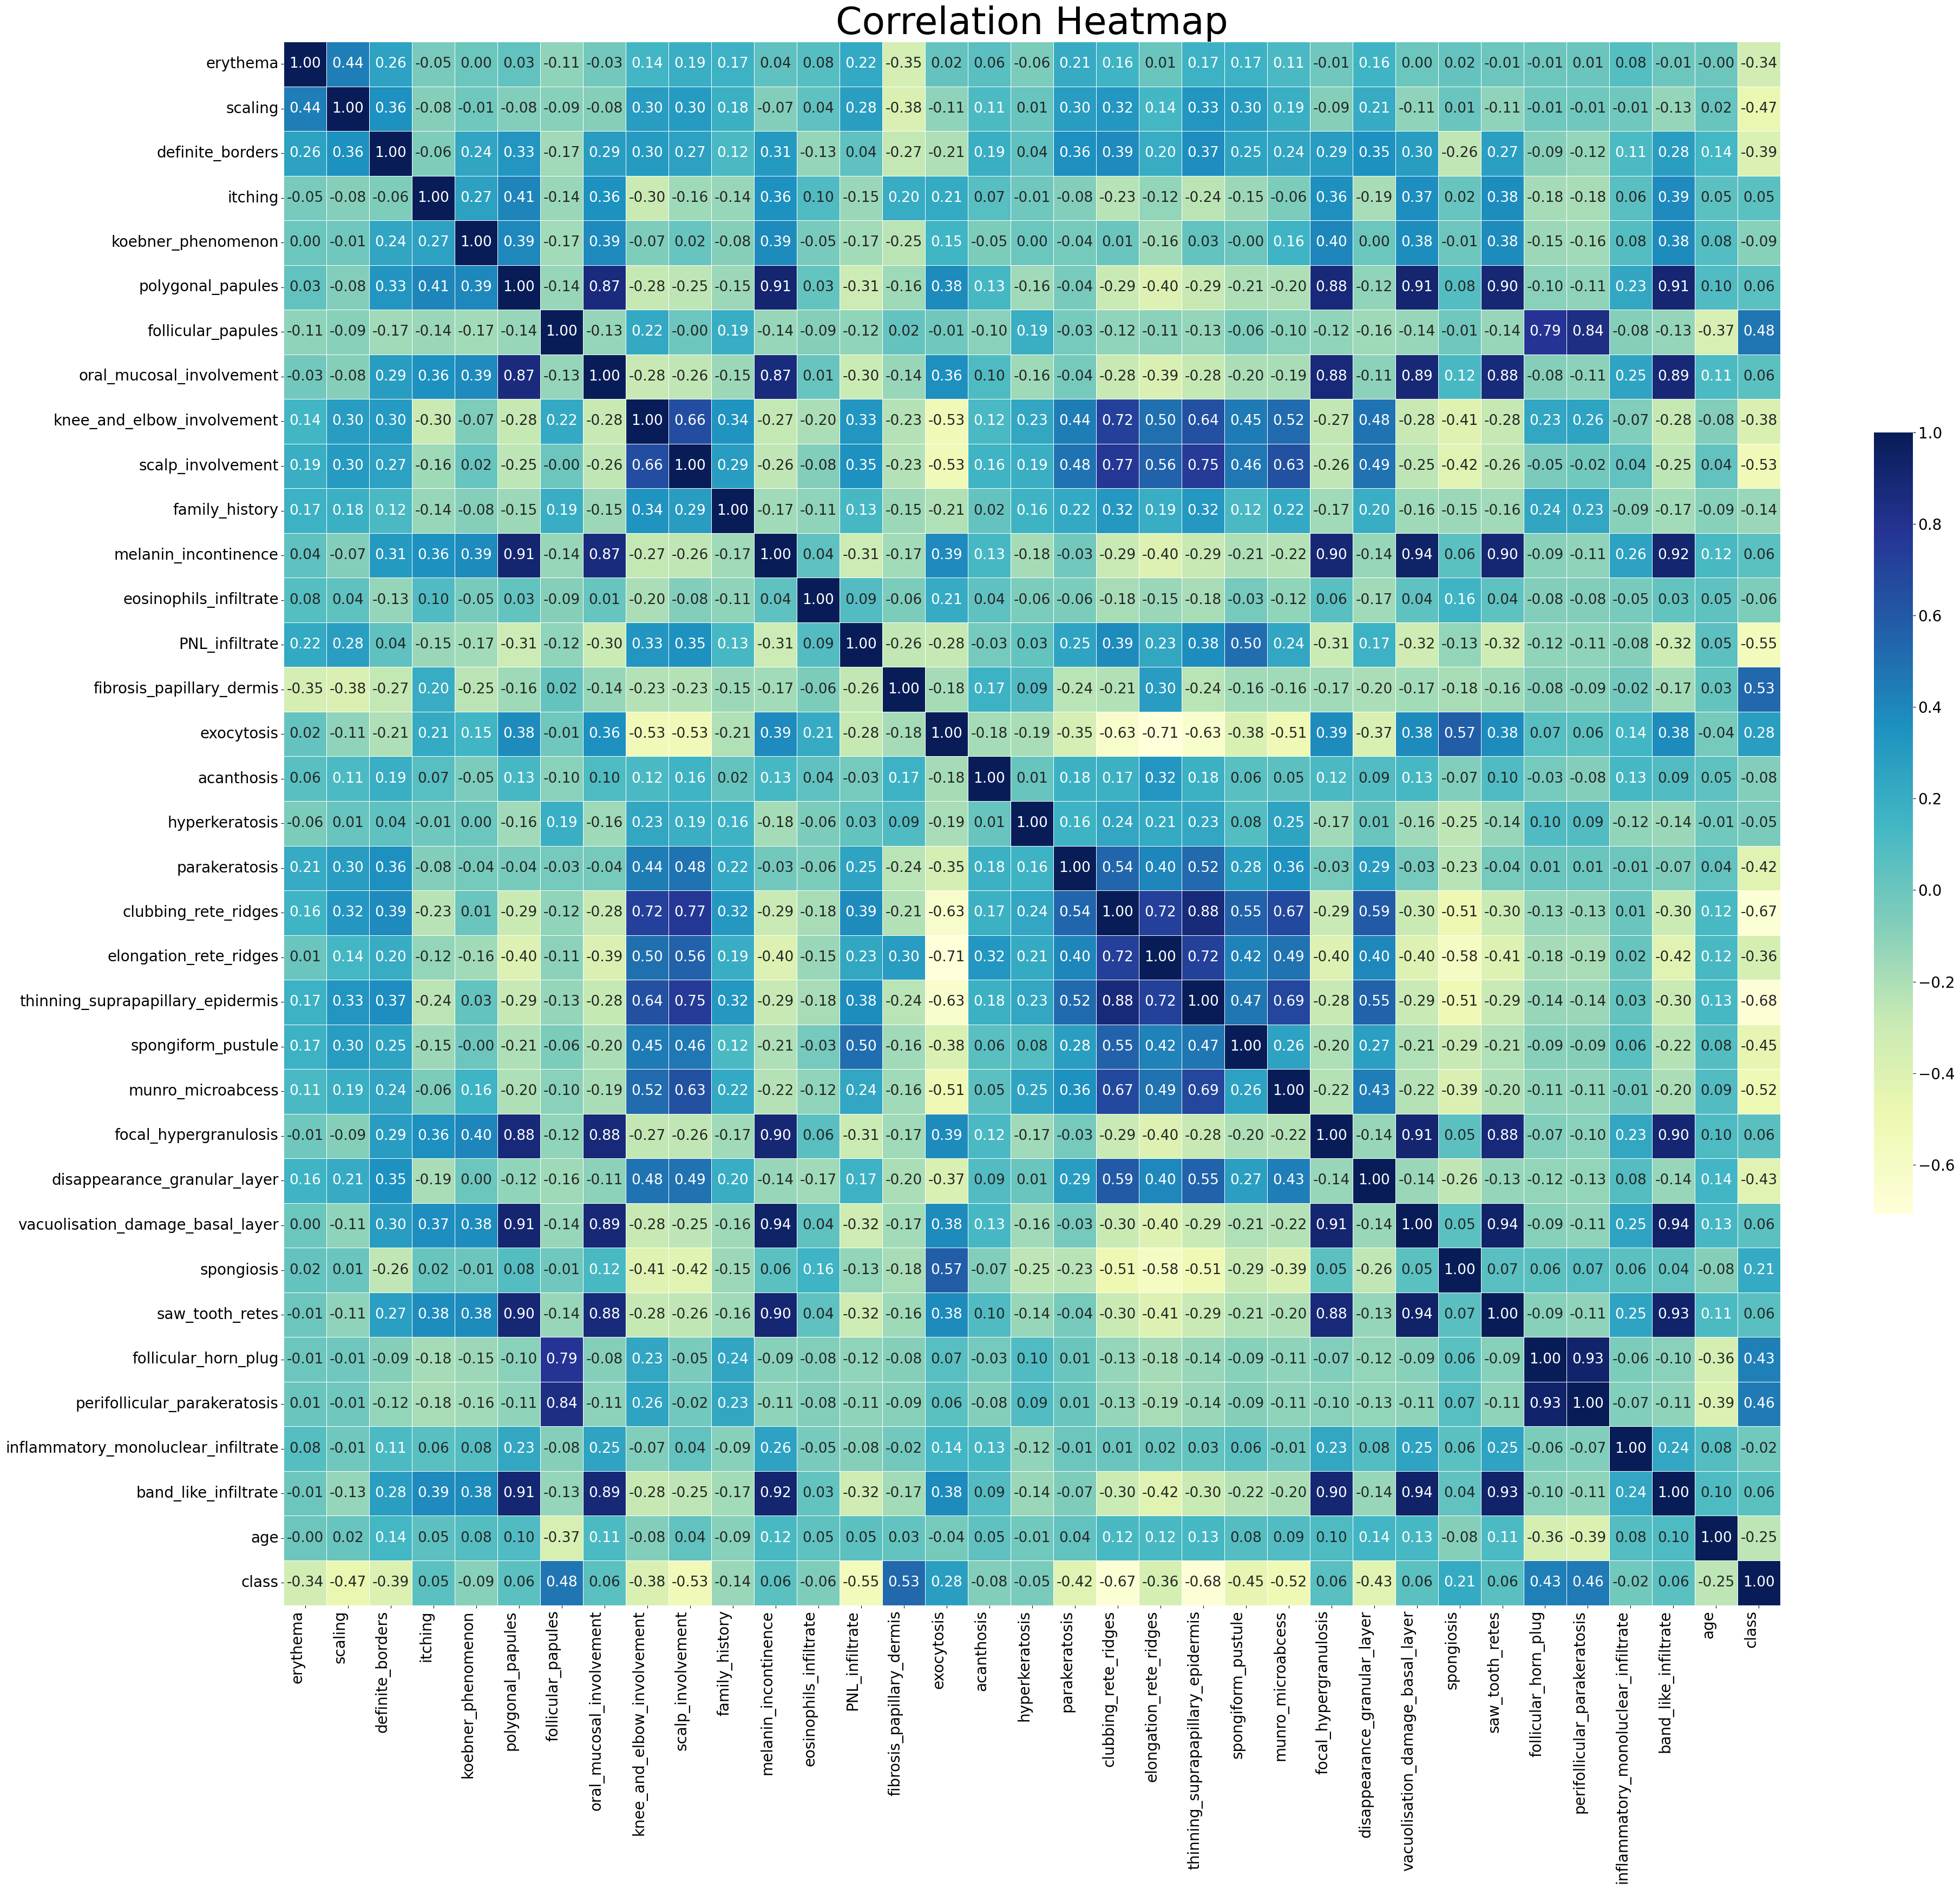

In [30]:
# Visualise correlation using correlation heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (40, 35))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu",
                 annot_kws={"size": 19},        
                 cbar_kws={"shrink": 0.5 }       
                )

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20)

plt.title("Correlation Heatmap", fontsize=50)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

# Display
plt.tight_layout()
plt.show()

#### Split the dataset
Split the dataset into training, validation and test sets.

In [31]:
# Split data into features

X = df.drop(columns = ['class'])
y = df['class']

# Split data into training, validation and test sets (7:1:2)
seed_num = 42
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = seed_num)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 2/3, random_state = seed_num)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (256, 34)
Validation set size: (36, 34)
Test set size: (74, 34)


#### Data preprocessing


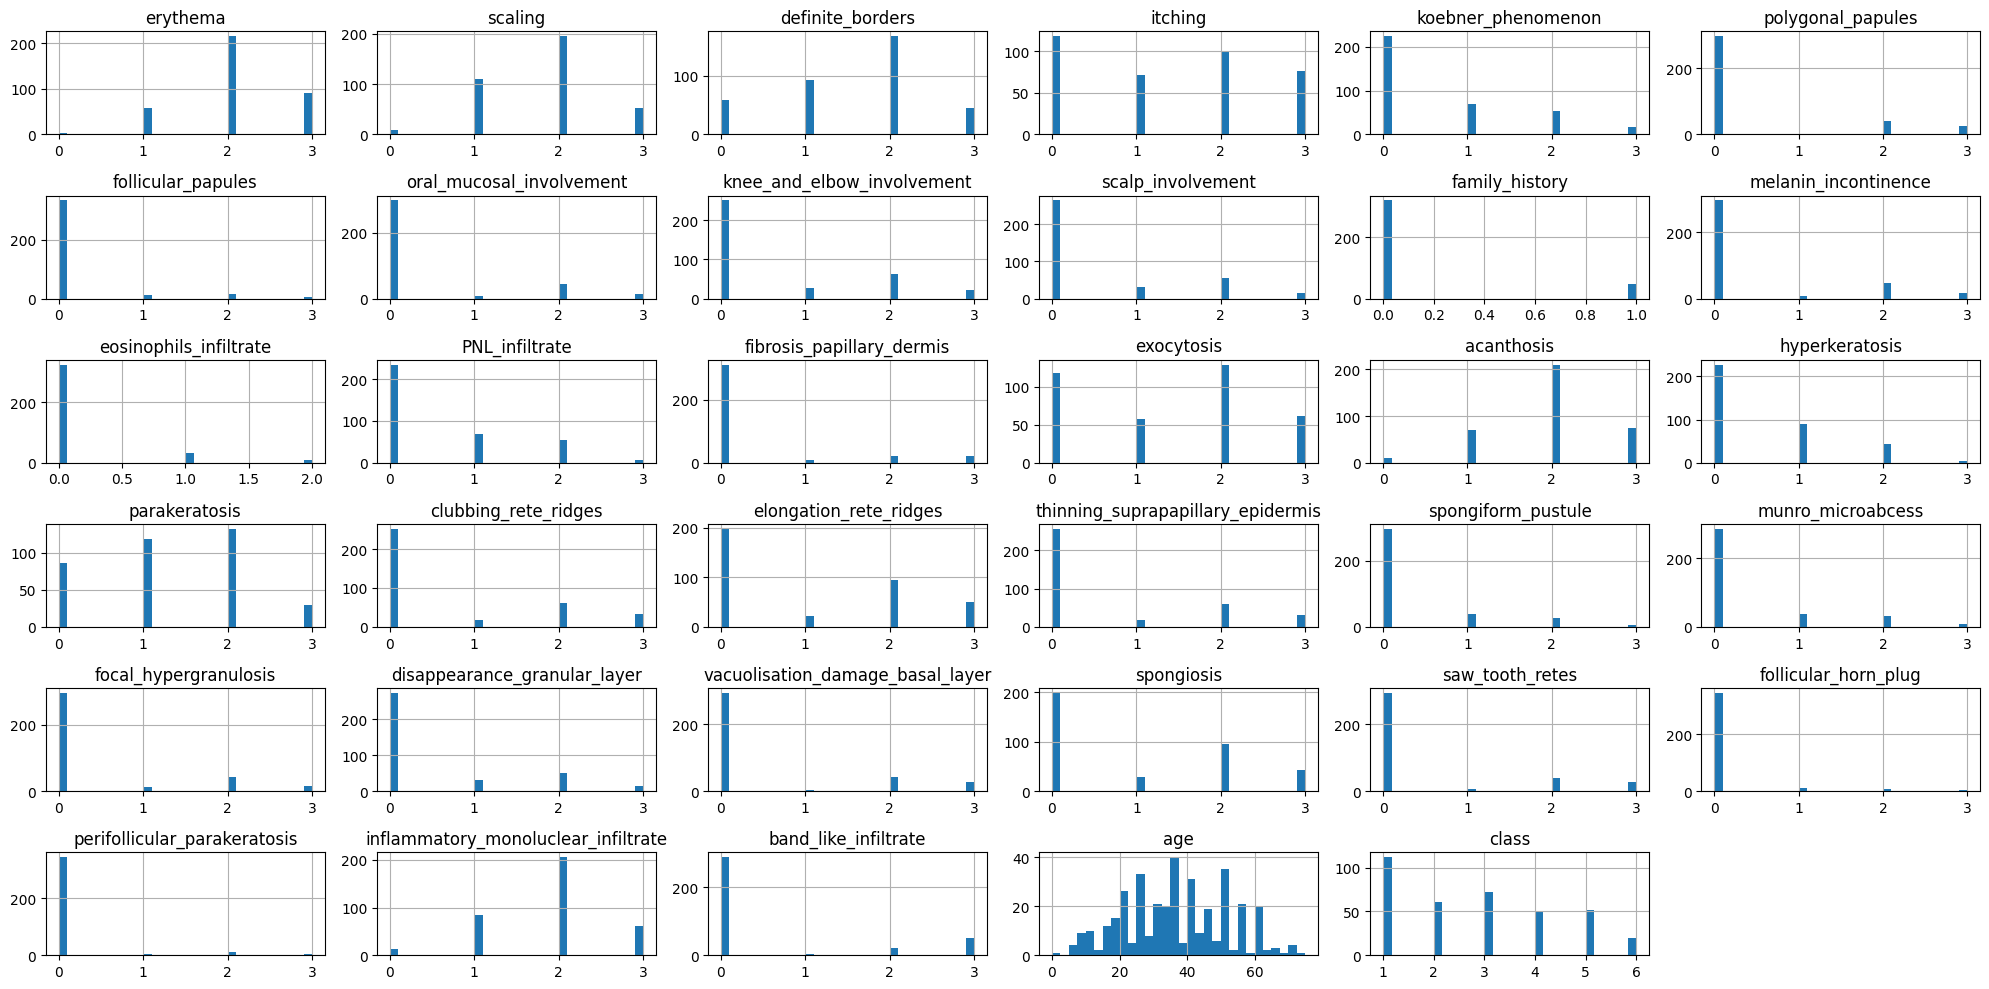

In [32]:
# Plot histograms
df.hist(bins = 30, figsize = (20, 10))
plt.tight_layout()
plt.show()

In [33]:
# Mean and standard deviation of the features before scaling
# Training set observation

print("Mean of the features before scaling:")
print(X_train.mean())

print("\nStandard deviation of the features before scaling:")
print(X_train.std())

Mean of the features before scaling:
erythema                                2.058594
scaling                                 1.816406
definite_borders                        1.550781
itching                                 1.382812
koebner_phenomenon                      0.640625
polygonal_papules                       0.476562
follicular_papules                      0.199219
oral_mucosal_involvement                0.410156
knee_and_elbow_involvement              0.605469
scalp_involvement                       0.507812
family_history                          0.125000
melanin_incontinence                    0.429688
eosinophils_infiltrate                  0.136719
PNL_infiltrate                          0.507812
fibrosis_papillary_dermis               0.343750
exocytosis                              1.390625
acanthosis                              1.933594
hyperkeratosis                          0.550781
parakeratosis                           1.238281
clubbing_rete_ridges            

In [34]:
# Standardise the features using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [36]:
print("Mean of the features after scaling:")
print(X_train.mean())

print("\nStandard deviation of the features after scaling:")
print(X_train.std())

Mean of the features after scaling:
erythema                              -2.775558e-17
scaling                               -6.938894e-17
definite_borders                       1.387779e-17
itching                               -6.938894e-18
koebner_phenomenon                     6.938894e-18
polygonal_papules                      1.908196e-17
follicular_papules                     6.938894e-17
oral_mucosal_involvement               3.122502e-17
knee_and_elbow_involvement             1.387779e-17
scalp_involvement                      7.632783e-17
family_history                        -4.163336e-17
melanin_incontinence                  -8.673617e-18
eosinophils_infiltrate                 3.469447e-17
PNL_infiltrate                        -4.857226e-17
fibrosis_papillary_dermis             -2.775558e-17
exocytosis                            -2.081668e-17
acanthosis                            -4.163336e-17
hyperkeratosis                        -4.163336e-17
parakeratosis               

#### Feature Selection

In [37]:
# RFE with Decision Tree Classifier
# Selecting the top 10 features using Recursive Feature Elimination (RFE)

rfe_selector = RFE(estimator=DecisionTreeClassifier(random_state=seed_num), n_features_to_select = 10, step = 1)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_val_rfe = rfe_selector.transform(X_val)
X_test_rfe = rfe_selector.transform(X_test)
rfe_selected_features = X.columns[rfe_selector.support_]

print("RFE Selected Features:", rfe_selected_features)

RFE Selected Features: Index(['itching', 'koebner_phenomenon', 'follicular_papules',
       'fibrosis_papillary_dermis', 'clubbing_rete_ridges',
       'thinning_suprapapillary_epidermis', 'disappearance_granular_layer',
       'vacuolisation_damage_basal_layer', 'follicular_horn_plug', 'age'],
      dtype='object')


In [38]:
# Feature importance using Decision Tree Classifier
# Selecting the top 10 features using feature importance

dt_classifier = DecisionTreeClassifier(random_state = seed_num)
dt_classifier.fit(X_train, y_train)
feature_importances = dt_classifier.feature_importances_

# Pair the feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the most important features
print("Feature importance:")
print(feature_importance_df)

top_10_features = feature_importance_df.head(10)
print("\nTop 10 Features:")
print(top_10_features)

Feature importance:
                                Feature  Importance
19                 clubbing_rete_ridges    0.280099
26     vacuolisation_damage_basal_layer    0.225713
14            fibrosis_papillary_dermis    0.182035
4                    koebner_phenomenon    0.133279
6                    follicular_papules    0.090934
25         disappearance_granular_layer    0.023784
21    thinning_suprapapillary_epidermis    0.017508
33                                  age    0.016980
29                 follicular_horn_plug    0.009559
23                    munro_microabcess    0.009418
15                           exocytosis    0.004848
2                      definite_borders    0.004848
3                               itching    0.000996
0                              erythema    0.000000
1                               scaling    0.000000
9                     scalp_involvement    0.000000
5                     polygonal_papules    0.000000
7              oral_mucosal_involvement    0

In [39]:
# List of selected features from RFE and feature importance
selected_features_RFE = [
    'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
    'fibrosis_papillary_dermis', 'clubbing_rete_ridges',
    'thinning_suprapapillary_epidermis', 'disappearance_granular_layer',
    'spongiosis', 'band_like_infiltrate', 'age'
]

selected_features_importance = [
    'clubbing_rete_ridges', 'vacuolisation_damage_basal_layer', 'fibrosis_papillary_dermis',
    'koebner_phenomenon', 'follicular_papules', 'disappearance_granular_layer',
    'thinning_suprapapillary_epidermis', 'age', 'follicular_horn_plug', 'munro_microabcess'
]

#### Data modeling

<u>K-Nearest Neighbors (KNN) Classifier</u>

In [40]:
# Hyperparameter tuning using GridSearchCV
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights'    : ['uniform', 'distance'],
    'metric'     : ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

# Fit on the scaled and selected training data
grid_search_knn.fit(X_train_rfe, y_train)

# Best estimator from grid search
best_knn = grid_search_knn.best_estimator_

print("Best KNN parameters:", grid_search_knn.best_params_)
print(f"CV Accuracy (best): {grid_search_knn.best_score_:.4f}\n")

Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
CV Accuracy (best): 0.9649



<u>Decision Tree Classifier</u>

In [41]:
# Filter the best features from X_train
X_train_dt = X_train[selected_features_importance]
X_val_dt = X_val[selected_features_importance]
X_test_dt = X_test[selected_features_importance]

In [42]:
# Hyperparameter tuning using GridSearchCV
decision_tree = DecisionTreeClassifier()

# Set up the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(
    estimator = decision_tree,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

# Fit on the scaled and selected training data
grid_search_dt.fit(X_train_dt, y_train)

# Best estimator from grid search
best_dt = grid_search_dt.best_estimator_

print("Best Decision Tree parameters:", grid_search_dt.best_params_)
print(f"CV Accuracy (best): {grid_search_dt.best_score_:.4f}\n")


Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV Accuracy (best): 0.9572



Since the best parameters with `max_depth: none`, leads to overfitting (when it is evaluated in the next section), we will set the max_depth to a define value.

In [43]:
# Hyperparameter tuning using GridSearchCV
decision_tree = DecisionTreeClassifier()

# Set up the parameter grid for Decision Tree
param_grid_2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_dt_2 = GridSearchCV(
    estimator = decision_tree,
    param_grid = param_grid_2,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

# Fit on the scaled and selected training data
grid_search_dt_2.fit(X_train_dt, y_train)

# Best estimator from grid search
best_dt_2 = grid_search_dt_2.best_estimator_

# Print the best parameters and CV accuracy
print("Best Decision Tree parameters:", grid_search_dt_2.best_params_)
print(f"CV Accuracy (best): {grid_search_dt_2.best_score_:.4f}\n")

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV Accuracy (best): 0.9532



#### Evaluate the models

<u>K-Nearest Neighbors (KNN) Classifier Evaluation</u>

KNN Validation Metrics
---------------------
Accuracy : 0.9167
Precision: 0.9325
Recall   : 0.9167
F1-score : 0.9182

KNN Classification Report (Validation):
———————————————————————————————————————————————————————
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         8
           4       1.00      0.86      0.92         7
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         1

    accuracy                           0.92        36
   macro avg       0.94      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



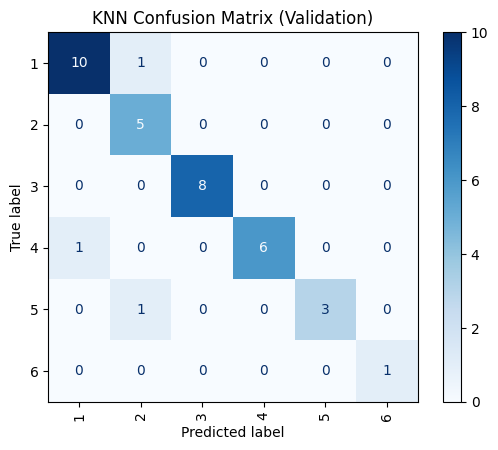

In [44]:
# KNN Validation performance (on X_val_rfe)
y_val_pred = best_knn.predict(X_val_rfe)

print("KNN Validation Metrics")
print("---------------------")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred, average = 'weighted'):.4f}")
print(f"Recall   : {recall_score(y_val, y_val_pred, average = 'weighted'):.4f}")
print(f"F1-score : {f1_score(y_val, y_val_pred, average = 'weighted'):.4f}\n")

print("KNN Classification Report (Validation):")
print("———————————————————————————————————————————————————————")
print(classification_report(y_val, y_val_pred))

cm_val = confusion_matrix(y_val, y_val_pred, labels = best_knn.classes_)
disp_val = ConfusionMatrixDisplay(confusion_matrix = cm_val,
                                  display_labels = best_knn.classes_)
disp_val.plot(cmap = 'Blues', xticks_rotation = 'vertical')
plt.title("KNN Confusion Matrix (Validation)")
plt.show()

KNN Test Metrics
--------------
Accuracy : 0.9324
Precision: 0.9417
Recall   : 0.9324
F1-score : 0.9351

KNN Classification Report (Test):
———————————————————————————————————————————————————————
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        29
           2       0.77      0.91      0.83        11
           3       1.00      1.00      1.00        11
           4       0.78      0.88      0.82         8
           5       1.00      0.92      0.96        12
           6       1.00      1.00      1.00         3

    accuracy                           0.93        74
   macro avg       0.92      0.94      0.93        74
weighted avg       0.94      0.93      0.94        74



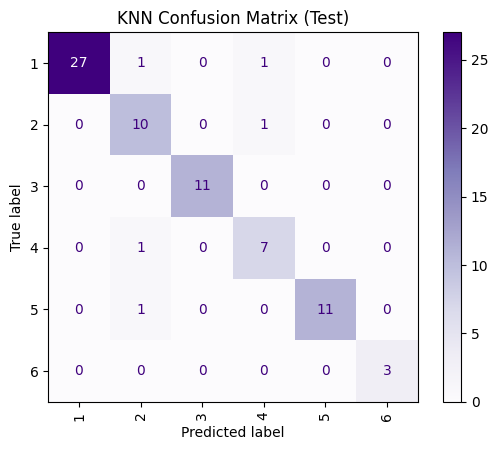

In [45]:
# KNN Test performance (on X_test_rfe)
y_test_pred = best_knn.predict(X_test_rfe)

print("KNN Test Metrics")
print("--------------")
print(f"Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred, average = 'weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_test_pred, average = 'weighted'):.4f}")
print(f"F1-score : {f1_score(y_test, y_test_pred, average = 'weighted'):.4f}\n")

print("KNN Classification Report (Test):")
print("———————————————————————————————————————————————————————")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred, labels = best_knn.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test,
                                   display_labels = best_knn.classes_)
disp_test.plot(cmap = 'Purples', xticks_rotation = 'vertical')
plt.title("KNN Confusion Matrix (Test)")
plt.show()

<u>Decision Tree Classifier Evaluation</u>

Decision Tree Validation Metrics
---------------------
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000

Decision Tree Classification Report (Validation):
———————————————————————————————————————————————————————
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



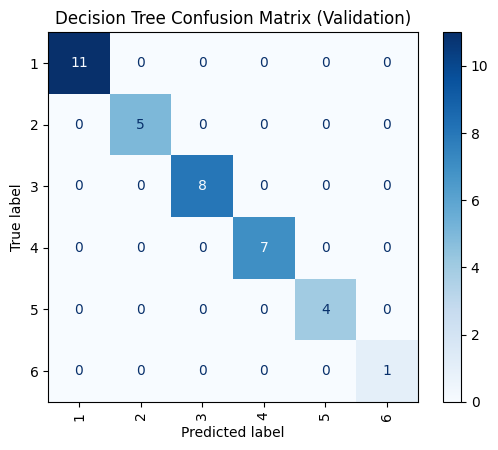

In [46]:
# Decision Tree Validation performance (on X_val_dt)
y_val_pred_dt = best_dt.predict(X_val_dt)

print("Decision Tree Validation Metrics")
print("---------------------")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred_dt):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_dt, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_val, y_val_pred_dt, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_val, y_val_pred_dt, average='weighted'):.4f}\n")

print("Decision Tree Classification Report (Validation):")
print("———————————————————————————————————————————————————————")
print(classification_report(y_val, y_val_pred_dt))

cm_val_dt = confusion_matrix(y_val, y_val_pred_dt, labels=best_dt.classes_)
disp_val_dt = ConfusionMatrixDisplay(confusion_matrix=cm_val_dt,
                                   display_labels=best_dt.classes_)
disp_val_dt.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Decision Tree Confusion Matrix (Validation)")
plt.show()


Decision Tree Test Metrics
--------------
Accuracy : 0.9459
Precision: 0.9511
Recall   : 0.9459
F1-score : 0.9462

Decision Tree Classification Report (Test):
———————————————————————————————————————————————————————
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.89      0.73      0.80        11
           3       1.00      1.00      1.00        11
           4       0.70      0.88      0.78         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.95        74



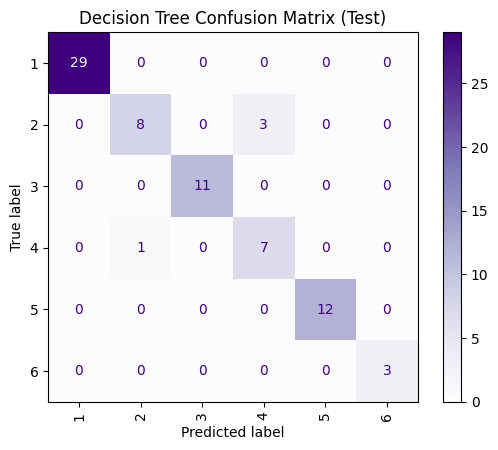

In [47]:
# Decision Tree Test performance (on X_test_dt)
y_test_pred_dt = best_dt.predict(X_test_dt)

print("\nDecision Tree Test Metrics")
print("--------------")
print(f"Accuracy : {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_test_pred_dt, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_test, y_test_pred_dt, average='weighted'):.4f}\n")

print("Decision Tree Classification Report (Test):")
print("———————————————————————————————————————————————————————")
print(classification_report(y_test, y_test_pred_dt))

cm_test_dt = confusion_matrix(y_test, y_test_pred_dt, labels=best_dt.classes_)
disp_test_dt = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt,
                                    display_labels=best_dt.classes_)
disp_test_dt.plot(cmap='Purples', xticks_rotation='vertical')
plt.title("Decision Tree Confusion Matrix (Test)")
plt.show()

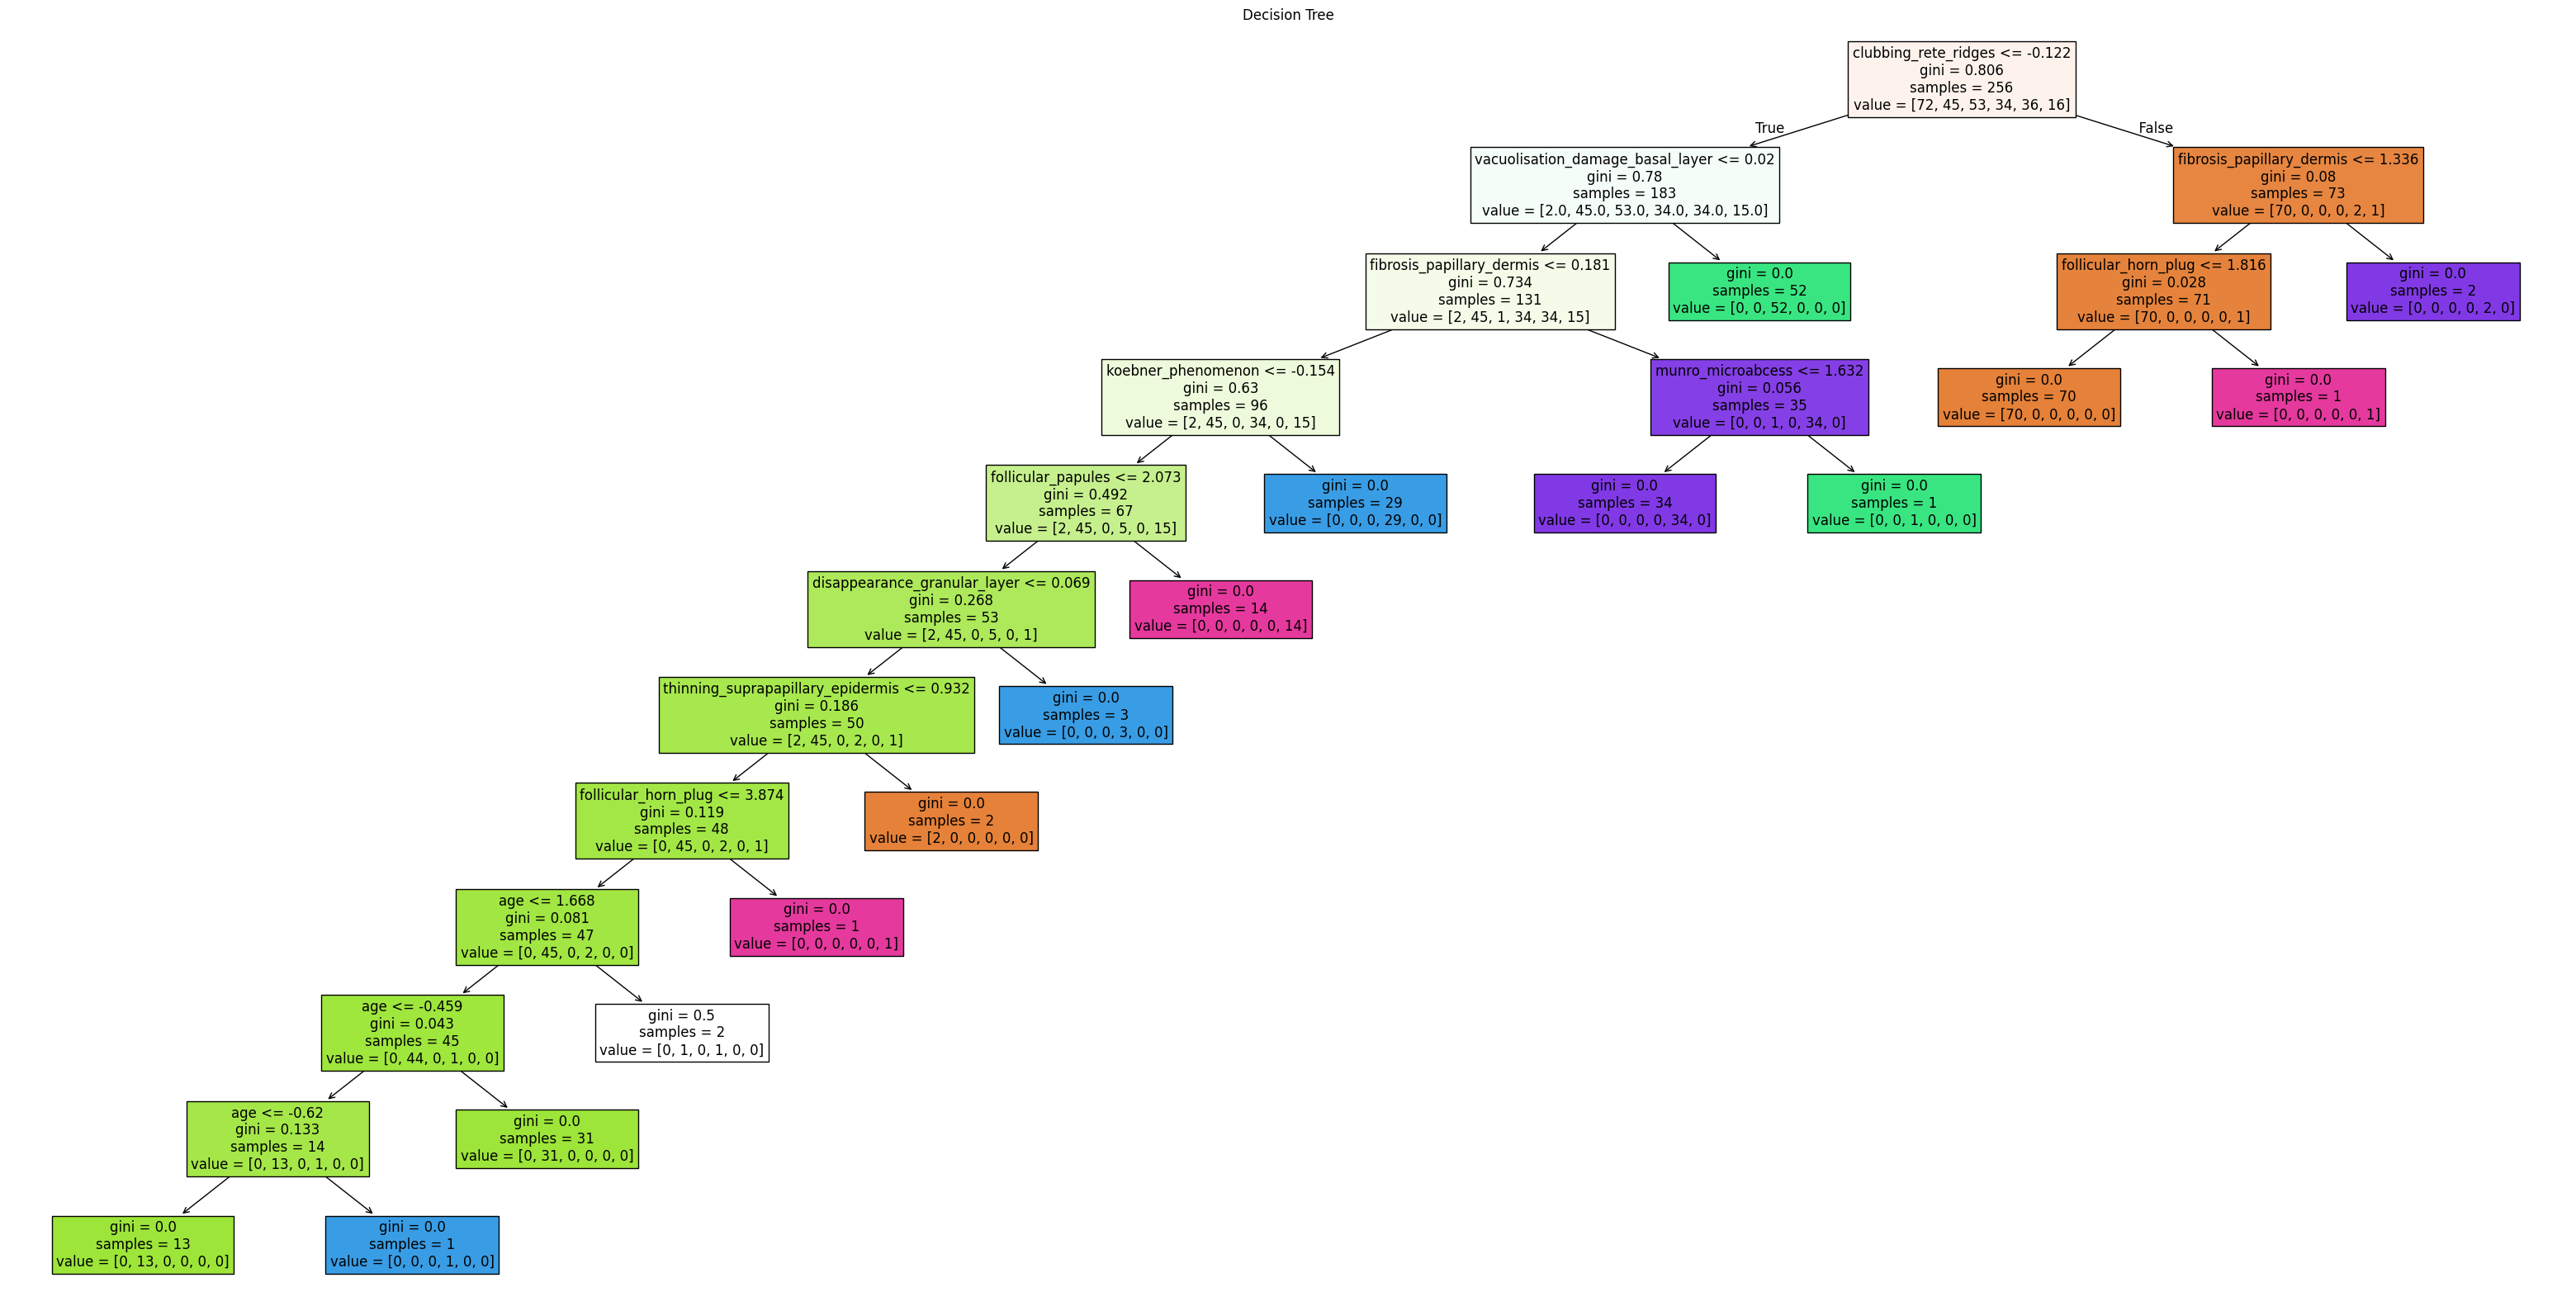

In [48]:
# Plot decision tree
plt.figure(figsize=(40, 20))
plot_tree(best_dt, 
           feature_names=X_test_dt.columns, 
           filled=True,
           fontsize=12)
plt.title("Decision Tree")
plt.show()

When the model is fitted with validation data, it has an accuracy of 100% and when it is fitted with test data, it has an accuracy of 95% which indicates that the model is overfitting.  

Although GridSearchCV selected `max_depth: None` as the optimal value based on cross-validation accuracy, this configuration resulted in a highly complex decision tree prone to overfitting, as evidenced by near-perfect accuracy on training/validation sets and a relative drop in test performance.

To improve generalization and model robustness, max_depth was manually constrained to a fixed value of 5, which yielded strong performance across all datasets while preventing overfitting.

The evaluation of that new model is as shown below.

Decision Tree Validation Metrics
---------------------
Accuracy : 0.9444
Precision: 0.9603
Recall   : 0.9444
F1-score : 0.9444

Decision Tree Classification Report (Validation):
———————————————————————————————————————————————————————
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         8
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.96      0.94      0.94        36



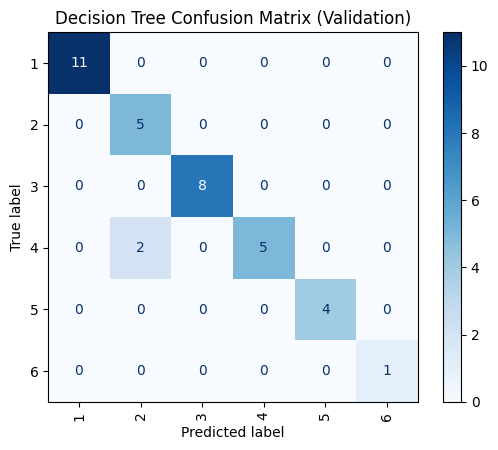

In [49]:
# Evaluation of the new Decision Tree model
# Decision Tree Validation performance (on X_val_dt)
y_val_pred_dt = best_dt_2.predict(X_val_dt)

print("Decision Tree Validation Metrics")
print("---------------------")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred_dt):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_dt, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_val, y_val_pred_dt, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_val, y_val_pred_dt, average='weighted'):.4f}\n")

print("Decision Tree Classification Report (Validation):")
print("———————————————————————————————————————————————————————")
print(classification_report(y_val, y_val_pred_dt))

cm_val_dt = confusion_matrix(y_val, y_val_pred_dt, labels=best_dt_2.classes_)
disp_val_dt = ConfusionMatrixDisplay(confusion_matrix=cm_val_dt,
                                   display_labels=best_dt_2.classes_)
disp_val_dt.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Decision Tree Confusion Matrix (Validation)")
plt.show()


Decision Tree Test Metrics
--------------
Accuracy : 0.9324
Precision: 0.9367
Recall   : 0.9324
F1-score : 0.9320

Decision Tree Classification Report (Test):
———————————————————————————————————————————————————————
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        29
           2       0.77      0.91      0.83        11
           3       1.00      1.00      1.00        11
           4       0.86      0.75      0.80         8
           5       1.00      1.00      1.00        12
           6       1.00      0.67      0.80         3

    accuracy                           0.93        74
   macro avg       0.93      0.88      0.90        74
weighted avg       0.94      0.93      0.93        74



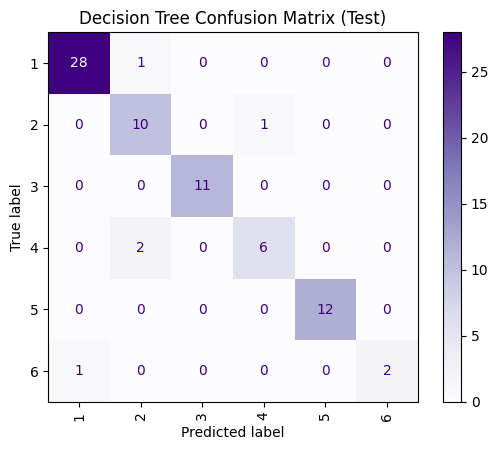

In [50]:
# Decision Tree Test performance (on X_test_dt)
y_test_pred_dt = best_dt_2.predict(X_test_dt)

print("\nDecision Tree Test Metrics")
print("--------------")
print(f"Accuracy : {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_test_pred_dt, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_test, y_test_pred_dt, average='weighted'):.4f}\n")

print("Decision Tree Classification Report (Test):")
print("———————————————————————————————————————————————————————")
print(classification_report(y_test, y_test_pred_dt))

cm_test_dt = confusion_matrix(y_test, y_test_pred_dt, labels=best_dt_2.classes_)
disp_test_dt = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt,
                                    display_labels=best_dt_2.classes_)
disp_test_dt.plot(cmap='Purples', xticks_rotation='vertical')
plt.title("Decision Tree Confusion Matrix (Test)")
plt.show()

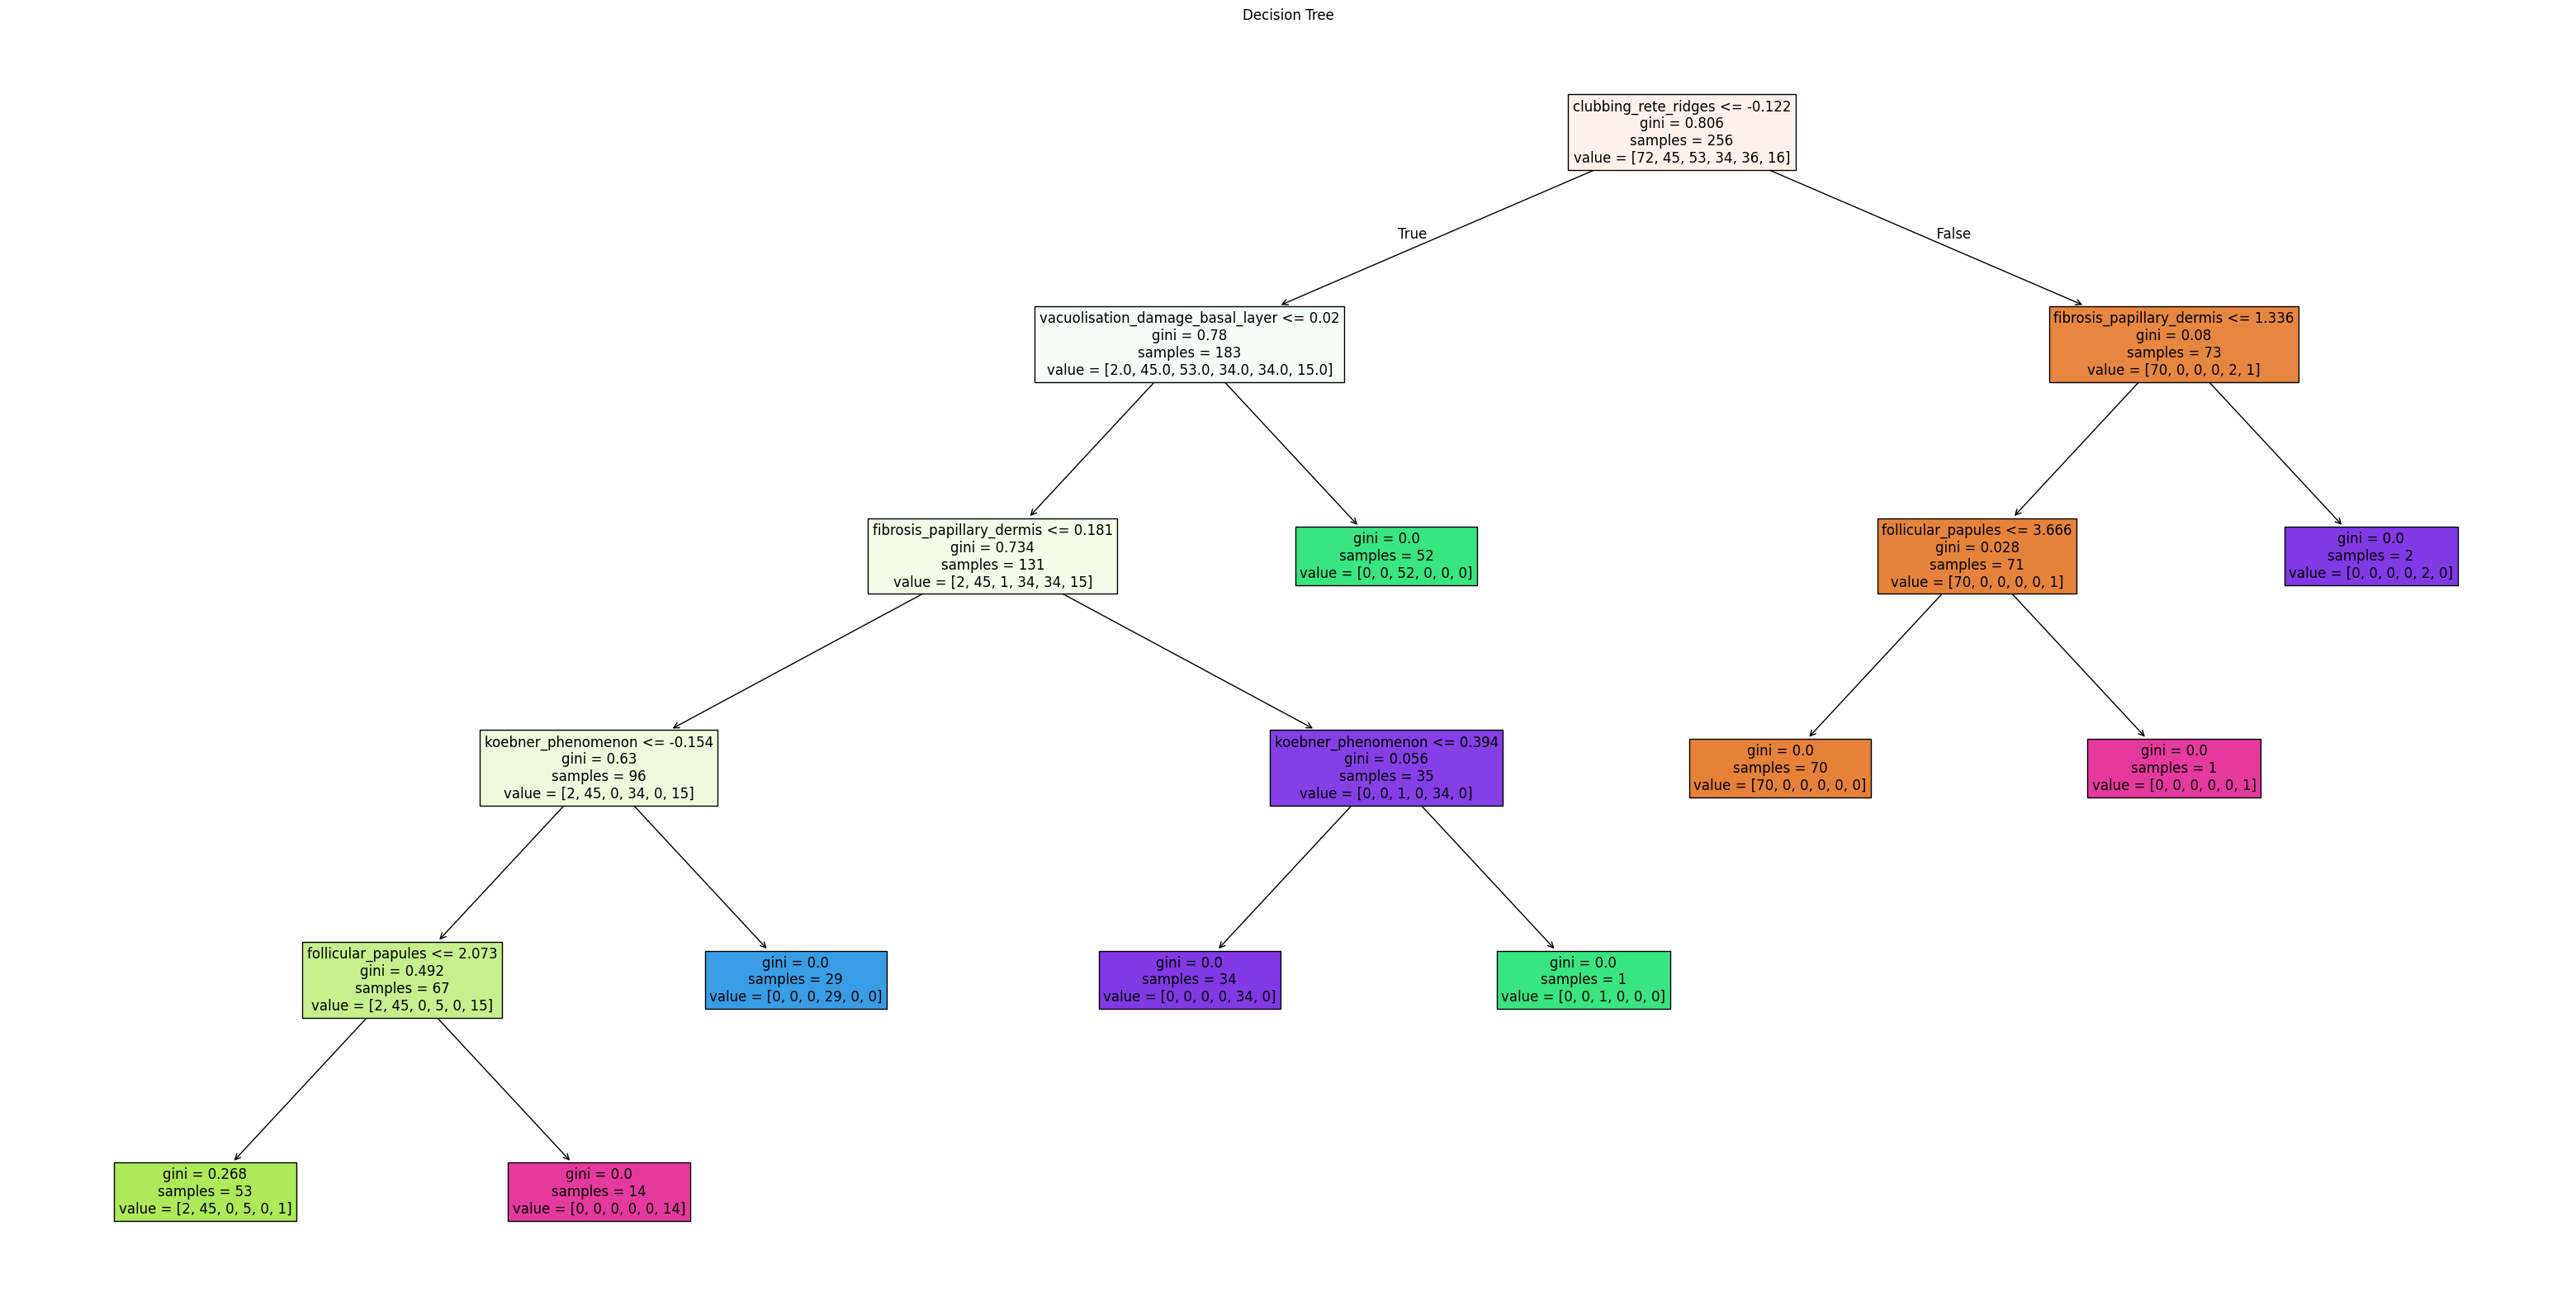

In [51]:
# Plot decision tree
plt.figure(figsize=(40, 20))
plot_tree(best_dt_2, 
           feature_names=X_test_dt.columns, 
           filled=True,
           fontsize=12)
plt.title("Decision Tree")
plt.show()

##### <u>Conclusion</u>

In this evaluation of the Dermatology dataset, we compared the K-Nearest Neighbors (KNN) and Decision Tree classifiers using multiple performance metrics on both validation and test datasets. The results are shown below for easier comparison. 

The Decision Tree classifier achieved perfect performance on the validation set (accuracy, precision, recall, F1-score = 1.0000), suggesting it overfits the training data because its performance dropped significantly on the test set (accuracy: 1.0000 → 0.9189), indicating weaker generalisation for unseen data. This is mainly due to the small size of validation set which contains only 10% of the 366 total instances, that is 36 samples after splitting. 

After constraining the tree depth to 5, the revised Decision Tree model achieved better generalization, with a validation accuracy of 0.9444 and a test accuracy of 0.9459 which has a much more consistent performance, though still slightly below that of the KNN model.

In contrast, KNN maintained strong and consistent performance across both validation and test sets, with only a small drop in test metrics (accuracy: 0.9722 → 0.9595) which means better generalisation.

In the context of dermatological diagnosis, consistent test performance is more important than perfect training performance, as the model needs to reliably classify unseen patient data. A model that overfits might perform well during development but poorly in real life, leading to misdiagnosis or delayed treatment.

Therefore, KNN model is the safer and more reliable choice for this medical classification task due to its generalisation capability. 

In [52]:
# Collect all metrics for easier comparison
comparison_data = {
    "Model": ["KNN", "KNN", "Decision Tree", "Decision Tree"],
    "Dataset": ["Validation", "Test", "Validation", "Test"],
    "Accuracy": [
        accuracy_score(y_val, y_val_pred),
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_val, y_val_pred_dt),
        accuracy_score(y_test, y_test_pred_dt),
    ],
    "Precision": [
        precision_score(y_val, y_val_pred, average='weighted'),
        precision_score(y_test, y_test_pred, average='weighted'),
        precision_score(y_val, y_val_pred_dt, average='weighted'),
        precision_score(y_test, y_test_pred_dt, average='weighted'),
    ],
    "Recall": [
        recall_score(y_val, y_val_pred, average='weighted'),
        recall_score(y_test, y_test_pred, average='weighted'),
        recall_score(y_val, y_val_pred_dt, average='weighted'),
        recall_score(y_test, y_test_pred_dt, average='weighted'),
    ],
    "F1-score": [
        f1_score(y_val, y_val_pred, average='weighted'),
        f1_score(y_test, y_test_pred, average='weighted'),
        f1_score(y_val, y_val_pred_dt, average='weighted'),
        f1_score(y_test, y_test_pred_dt, average='weighted'),
    ],
}

# Create the DataFrame
results_df = pd.DataFrame(comparison_data)

# Display as a formatted table
from IPython.display import display
display(results_df.round(4))

,Model,Dataset,Accuracy,Precision,Recall,F1-score
0,KNN,Validation,0.9167,0.9325,0.9167,0.9182
1,KNN,Test,0.9324,0.9417,0.9324,0.9351
2,Decision Tree,Validation,0.9444,0.9603,0.9444,0.9444
3,Decision Tree,Test,0.9324,0.9367,0.9324,0.9320
